# Abstract

Estimation of Survival Time for patient in waiting list for Liver Transplant:

- Survival Time: time spent in the list before either: death, transplant, censored
- Time horizon for censoring: 5 years
- We assume non eligible patients as deceased (+ 0 months death)
- For the moment being we consider only person that exited the list after 2012 (to be clarified and discussed with Prosperi)

### Imports
Import libraries and write settings here.

In [35]:
# OS related
import os
import sys
from pathlib import Path

# Data manipulation
import pandas as pd
import numpy as np

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30
pd.options.display.float_format = '{:,.4f}'.format

# autoreload extension
%load_ext autoreload
%autoreload 2

# add repo root path to pythonpath
### Note: this assumes custom python modules are accessible in the root path AND notebooks are in a folder inside root, e.g. root/notebooks
sys.path.insert(0, str(Path.cwd() / 'src'))
from utils import anonymize_df, deanonymize_df

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Read Data
Read/Import data here

In [36]:
df_new = pd.read_excel('data/LISTS FEGA export Ravaioli usciti BOLOGNA 2004-2022 V3 4.xlsx', engine='openpyxl')
df_new.drop(['nome', 'cognome'], axis=1, inplace=True)
df_new, le = anonymize_df(df_new, 'NOMECOGNOME')

df_new

,patient_id,ctx,codice_dm,nas_data,lista_ingresso_data,lista_uscita_data,causa_uscita,data_decesso,causa_decesso,pers_sesso,lista_id,pers_eta_ingresso_in_lista,diagnosi,diagnosi_specifica,eltr,tot_tx_organo,tx_fegato_corrente,iscriz_tx_comb,tipo_combinato,ric_HBsAg,ric_DELTA,ric_HCV,ric_HCV_RNA,ric_HIV,ric_eccezione_MELD_PELD,...,donatore_bassaportata2_data,donatore_bassaportata2_ora,donatore_bassaportata2_durata,donatore_bassaportata2_PAmax,donatore_bassaportata2_PAmin,donatore_bassaportata2_trattamento,donatore_bassaportata3_data,donatore_bassaportata3_ora,donatore_bassaportata3_durata,donatore_bassaportata3_PAmax,donatore_bassaportata3_PAmin,donatore_bassaportata3_trattamento,donatore_hcv,donatore_HBsAg,donatore_HBsAb,donatore_HBeAg,donatore_HBeAb,donatore_antiCoreTot,donatore_hbv_dna,donatore_hcv_rna,donatore_steatosiMacro,donatore_biopsiaEpatica,donatore_biopsiaRenale,donatore_livelloRischioPreLT,donatore_variazioneLivello
0,1406,BOLOGNA,13857,1957-10-06,2002-12-05,2004-01-01,Deceduto iscritto in lista,2004-01-01,,F,21386,45,NaN,NaN,NaN,NaN,NaN,NO,NaN,NO,NO,NO,NO,NO,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1985,BOLOGNA,14171,1950-06-07,2003-12-17,2004-01-05,Deceduto iscritto in lista,2004-01-05,,M,21701,53,Cirrosi postnecrotica da HCV,NaN,NaN,NaN,NaN,NO,NaN,NO,NO,SI,NO,NO,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,577,BOLOGNA,13274,1964-06-06,2004-01-07,2004-01-07,Escluso per volonta' del paziente,NaT,,F,20792,39,Altra epatopatia,NaN,NaN,NaN,NaN,NO,NaN,NO,NO,NO,NO,NO,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,723,BOLOGNA,13377,1938-02-07,2003-12-05,2004-01-07,Deceduto iscritto in lista,2004-01-07,,M,20896,65,Cirrosi postnecrotica da HCV,NaN,NaN,NaN,NaN,NO,NaN,NO,NO,SI,SI,NO,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,972,BOLOGNA,13553,1940-01-14,2003-09-25,2004-01-10,TX nel centro di iscrizione,NaT,,M,21075,63,Epatocarcinoma associato a cirrosi,NaN,NaN,0.0000,1.0000,NO,NaN,NO,NO,SI,SI,NO,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1486,BOLOGNA,13897,1952-05-22,2003-05-15,2004-01-17,Deceduto iscritto in lista,2004-01-17,,M,21426,50,Epatocarcinoma associato a cirrosi,NaN,NaN,NaN,NaN,NO,NaN,NO,NO,SI,NO,NO,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,265,BOLOGNA,13061,1959-06-01,2004-01-08,2004-01-19,Non idoneo clinicamente,NaT,,M,20579,44,Epatocarcinoma associato a cirrosi,NaN,NaN,NaN,NaN,NO,NaN,NO,NO,SI,SI,NO,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,140,BOLOGNA,12991,1952-05-07,2004-01-15,2004-01-20,TX nel centro di iscrizione,2004-02-17,,F,20507,51,Cirrosi di Laennec (post-alcolica),NaN,NaN,0.0000,1.0000,NO,NaN,NO,NO,NO,NO,NO,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,460,BOLOGNA,13201,1958-05-25,2003-12-18,2004-01-20,TX nel centro di iscrizione,NaT,,M,20718,45,Epatocarcinoma associato a cirrosi,NaN,NaN,0.0000,1.0000,NO,NaN,NO,NO,SI,SI,NO,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2121,BOLOGNA,14256,1957-07-04,2003-10-16,2004-01-24,TX nel centro di iscrizione,2005-10-12,,M,21787,46,Cirrosi postnecrotica da HCV,NaN,NaN,0.0000,1.0000,NO,NaN,NO,NO,SI,SI,NO,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# import mitosheet
# mitosheet.sheet(df_new, analysis_to_replay="id-pzrdchfcco")

In [ ]:
# from mitosheet import *; register_analysis("id-pzrdchfcco");
    
# # Renamed columns organo_trapiantatoOS
# df_new.rename(columns={'organo_trapiantato': 'organo_trapiantatoOS'}, inplace=True)

# # Renamed columns donatore_hcv_rnaOS
# df_new.rename(columns={'donatore_hcv_rna': 'donatore_hcv_rnaOS'}, inplace=True)

# # Duplicated df_new
# df_new_copy = df_new.copy(deep=True)

# # Renamed df_new_copy to non_trapiantati
# non_trapiantati = df_new_copy

# # Filtered data_trapianto
# non_trapiantati = non_trapiantati[~non_trapiantati['data_trapianto'].isin(pd.to_datetime(['2016-03-30', '2006-05-31', '2015-12-15', '2011-03-26', '2016-02-03', '2012-06-04', '2008-02-19', '2010-05-04', '2010-09-02', '2008-08-28', '2017-06-23', '2010-05-13', '2009-10-03', '2009-11-28', '2017-03-04', '2010-02-20', '2010-05-03', '2010-09-21', '2016-12-29', '2010-08-01', '2016-07-28', '2017-06-28', '2016-11-06', '2005-09-01', '2010-09-13', '2016-11-16', '2010-07-03', '2009-06-04', '2016-05-26', '2011-02-28', '2016-06-17', '2022-02-24', '2021-12-23', '2016-09-25', '2004-01-20', '2021-05-10', '2005-05-27', '2004-09-14', '2022-04-14', '2021-10-15', '2021-05-07', '2022-01-12', '2021-06-12', '2010-11-05', '2014-03-15', '2014-05-29', '2013-09-19', '2013-09-18', '2013-09-11', '2013-07-23']))]

# # Added column new-column-lhig
# non_trapiantati.insert(70, 'new-column-lhig', 0)

# # Renamed columns trapiantato
# non_trapiantati.rename(columns={'new-column-lhig': 'trapiantato'}, inplace=True)

# # Set formula of trapiantato
# non_trapiantati['trapiantato'] = non_trapiantati['transplanted']

# # Filtered trapiantato
# non_trapiantati = non_trapiantati[non_trapiantati['trapiantato'] == True]

# # Filtered transplanted
# non_trapiantati = non_trapiantati[non_trapiantati['transplanted'] == True]

# # Filtered donatore_BMI
# non_trapiantati = non_trapiantati[non_trapiantati['donatore_BMI'].isna()]


In [ ]:

# # deceased/censored/transplanted
# df_new['deceased'] = ~df_new.data_decesso.isna()
# df_new['censored'] = ~df_new['deceased']
# df_new['transplanted'] = ~df_new.data_trapianto.isna()

# df_new[df_new.transplanted==1 & df_new.donatore_eta.isna()]

## Compute deceased and censored

### Assumptions

<div class="alert alert-block alert-info">

The **assumptions** are:
 - if `data_decesso` is missing $\longrightarrow$ patient is alive (right-censored)
 - **time origin (TO)** is `lista_ingresso_data`, which assumes all patients enters at equal conditions (possible bias, should we change TO? $\longrightarrow$ CHECK UNDERLYING MECHANISMS)
 - **survival time (ToS)** is `lista_uscita_data - lista_ingresso_data`, where `lista_uscita_data` is either the *date of death* or the *last update* (CHECK)
</div>

In [ ]:
pd.set_option('display.max_columns', None)
df_new.head(4)

In [ ]:
df_new.lista_uscita_data.isna().sum(), df_new.lista_uscita_data.max()

# no missing values

### Pre-processing 

In [ ]:
#import mitosheet

#mitosheet.sheet(df_new, analysis_to_replay="id-znglszneef")

In [ ]:
#from mitosheet import *; register_analysis("id-znglszneef");
    
# Filtered lista_uscita_data
#df_new = df_new[df_new['lista_uscita_data'] >= pd.to_datetime('2012-01-01')]


In [38]:
AGE_UNIT=30
TIME_HORIZON=60

df_new = df_new[df_new['lista_uscita_data'] >= pd.to_datetime('2012-01-01')]

pd.set_option('display.min_rows', None)

causa_uscita_filter = ['Deceduto iscritto in lista', 'Non idoneo clinicamente', 'TX nel centro di iscrizione']

df_new = df_new[df_new['causa_uscita'].isin(causa_uscita_filter)]

# deceased/censored/transplanted
df_new['deceased'] = ~df_new.data_decesso.isna()
df_new['censored'] = df_new['causa_uscita'].str.contains('TX nel centro di iscrizione')
df_new['transplanted'] = ~df_new.data_trapianto.isna()

# Waiting Time in List
df_new['WTL'] = (df_new['lista_uscita_data'] - df_new['lista_ingresso_data']).dt.days/AGE_UNIT

inspetction_cols = ['patient_id', 'lista_ingresso_data', 'lista_uscita_data', 'data_decesso', 'cfr_death_exit', 'data_trapianto', 'causa_decesso', 'causa_uscita']

df_new['WTL'].min()

0.0

<AxesSubplot:>

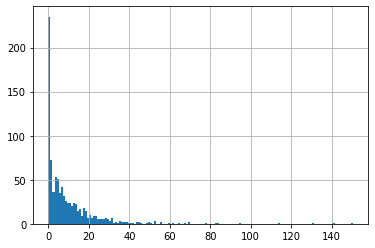

In [45]:
df_new.loc[df_new['transplanted'],'WTL'].hist(bins=150)

<div class='alert alert-block alert-info'>
    
`lista_uscita_data` is not always indicative of survival for deceased patients, as some people die after exiting the waiting list
    
$\longrightarrow$

$\begin{equation} ToS =  \text{data_decesso} - \text{lista_ingresso_data} \hspace{1cm} \text{if deceased} \\ ToS =  \text{lista_uscita_data} - \text{lista_ingresso_data} \hspace{1cm} \text{otherwise} \end{equation}$ 
</div>

## Drop columns with too many NaNs 

<div class='alert alert-block alert-info'>

This step must be done after proper encoding for missing values, e.g. distinguish between *missing="unkwnown" VS *missing="unobserved"*, e.g. `data_decesso==NaT` means that the patient is still alive (hence is not a missing value).
</div>

In [11]:
nan_pct = df_new.isna().mean()*100

nan_pct.loc['data_decesso']

74.62817147856518

In [12]:
NAN_MAX_CUTOFF = 20

interesting_cols = list(nan_pct[nan_pct <= NAN_MAX_CUTOFF].index)


print(f'Columns retained for the analysis ({len(interesting_cols)}):\n')
[print(col) for col in interesting_cols]

# removing unimportant variables
drop_columns = ['lista_uscita_data', 'lista_ingresso_data', 'diagnosi', 'ctx', 'codice_dm', 'lista_id', 'causa_uscita', 'data_UNOS', 'nas_data', 'causa_decesso', 'patient_id', 'iscriz_tx_comb']

df_new = df_new[interesting_cols]
df_new.drop(drop_columns, axis=1, inplace=True)

# encoding categoricals
categories = ['pers_sesso', 'ric_HCV', 'HCC', 'trombosi_portale', 'ric_HBsAg',
              'UNOS', 'ric_HIV', 'ric_DELTA','ric_HCV_RNA', 'chirurgia_addom', 'ISO2_super_urgenza',
              'TIPS', 'CHILD', 'dialisi_ultimi_15gg']

df_new = pd.get_dummies(df_new, columns=categories, drop_first=True)

df_new.head(10)

Columns retained for the analysis (38):

patient_id
ctx
codice_dm
nas_data
lista_ingresso_data
lista_uscita_data
causa_uscita
causa_decesso
pers_sesso
lista_id
pers_eta_ingresso_in_lista
diagnosi
tot_tx_organo
tx_fegato_corrente
iscriz_tx_comb
ric_HBsAg
ric_DELTA
ric_HCV
ric_HCV_RNA
ric_HIV
Peso
Altezza
BMI
MELD_base
chirurgia_addom
trombosi_portale
TIPS
HCC
MELD_base.1
dialisi_ultimi_15gg
UNOS
data_UNOS
CHILD
ISO2_super_urgenza
deceased
censored
transplanted
WTL


,pers_eta_ingresso_in_lista,tot_tx_organo,tx_fegato_corrente,Peso,Altezza,BMI,MELD_base,MELD_base.1,deceased,censored,transplanted,WTL,pers_sesso_M,ric_HCV_SI,HCC_SI,trombosi_portale_PARZIALE,trombosi_portale_SI,ric_HBsAg_SI,UNOS_2A,UNOS_2B,UNOS_3,ric_HIV_SI,ric_DELTA_SI,ric_HCV_RNA_SI,chirurgia_addom_SI,ISO2_super_urgenza_SI,TIPS_SI,CHILD_A6,CHILD_B7,CHILD_B8,CHILD_B9,CHILD_C10,CHILD_C11,CHILD_C12,CHILD_C13,CHILD_C14,CHILD_C15,dialisi_ultimi_15gg_SI
1166,55,0.0000,1.0000,80.0000,169.0000,28.0100,27.0000,27.0000,False,True,True,45.7333,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1167,47,0.0000,1.0000,70.0000,178.0000,22.0900,27.0000,27.0000,False,True,True,1.4333,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1168,62,NaN,NaN,64.0000,160.0000,25.0000,21.0000,21.0000,True,False,False,1.9667,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1169,24,0.0000,1.0000,68.0000,171.0000,23.2600,8.0000,8.0000,False,True,True,1.2667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1170,42,0.0000,1.0000,92.0000,186.0000,26.5900,12.0000,12.0000,False,True,True,15.8000,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1171,42,0.0000,1.0000,105.0000,187.0000,30.0300,24.0000,24.0000,False,True,True,13.0667,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1172,66,0.0000,1.0000,70.0000,170.0000,24.2200,13.0000,13.0000,True,True,True,4.3333,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1173,63,0.0000,1.0000,71.0000,170.0000,24.5700,18.0000,18.0000,True,True,True,6.3000,1,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
1174,50,0.0000,1.0000,84.0000,172.0000,28.3900,21.0000,21.0000,False,True,True,27.5000,1,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0
1175,59,1.0000,2.0000,80.0000,169.0000,28.0100,31.0000,31.0000,False,True,True,0.3000,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [13]:
dropped = list(nan_pct[nan_pct > NAN_MAX_CUTOFF].index)


print(f'Columns dropped for the analysis ({len(dropped)}):\n')
_ = [print(col) for col in dropped]

df_new = df_new.dropna()

Columns dropped for the analysis (125):

data_decesso
diagnosi_specifica
eltr
tipo_combinato
ric_eccezione_MELD_PELD
Na
MELD_in_ingresso
MELD_in_uscita
chirurgia_addom_note
trombosi_portale_note
ric_diabete
Categoria HCC
HCC_esordio
HCC_noduli
HCC_downstaging
HCC_diam_max
HCC_diam_totale
HCC_stadio_TNM
HCC_resezione
Na_MELD
HCC_MELD
AFP
tx_effettivo_data
scheda48h_tx_effettivo_combinato
scheda48h_tipo_tx_effettivo_combinato
fega_note
ISO2_tipo_super_urgenza
ISO2_Ecc. MELD
ISO2_valid_score
ISO2_valid_increment
ISO2_valid_giorni
ISO2_valid_mesi
ISO2_valid_anzianita
ISO2_allocazione
ric_ospedalizzazione_al_tx
data_trapianto
organo_trapiantato
ischemia_fredda
ric_ripresa_funzionale
rigetto
ultimo_stato_tx
data_ultimo_agg_followup
codice_sit_donazione
donazione_ospedale
donazione_sede
donatore_eta
donatore_sesso
trap_don_decesso_id
donatore_caus_decesso
donatore_decesso_note
tipo_donazione
donatore_noteDCDDBD
donatore_sesso.1
donatore_eta.1
donatore_peso
donatore_altezza
donatore_BMI
donato

# Explorative/Data Visualization
Explore and visualize data

# Analysis/Modeling


In [14]:
X = df_new.drop(['WTL', 'censored', 'deceased', 'transplanted'], axis=1)
y = df_new[['WTL', 'censored']]
y['censored'] = ~y['censored']

<ipython-input-14-e881112239f4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['censored'] = ~y['censored']


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [16]:
from src.model import *
from tensorflow.keras.callbacks import EarlyStopping

model = SurvivalNN(len(X.iloc[0]), hidden=[32, 32])
model.compile(optimizer='Adam')
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
history = model.fit(X_train.astype('float32'), y_train.astype('float32'),
                    batch_size=32, epochs=200, verbose=1, callbacks=[callback])

Epoch 1/200
24/24 [==============================] - 1s 3ms/step - loss: 66.1008
Epoch 2/200
24/24 [==============================] - 0s 3ms/step - loss: 35.2552
Epoch 3/200
24/24 [==============================] - 0s 3ms/step - loss: 34.3535
Epoch 4/200
24/24 [==============================] - 0s 3ms/step - loss: 33.9179
Epoch 5/200
24/24 [==============================] - 0s 3ms/step - loss: 33.3084
Epoch 6/200
24/24 [==============================] - 0s 3ms/step - loss: 33.1397
Epoch 7/200
24/24 [==============================] - 0s 3ms/step - loss: 33.3617
Epoch 8/200
24/24 [==============================] - 0s 3ms/step - loss: 33.3296
Epoch 9/200
24/24 [==============================] - 0s 3ms/step - loss: 32.8991
Epoch 10/200
24/24 [==============================] - 0s 3ms/step - loss: 33.1313
Epoch 11/200
24/24 [==============================] - 0s 3ms/step - loss: 33.5081
Epoch 12/200
24/24 [==============================] - 0s 3ms/step - loss: 33.3490
Epoch 13/200
24/24 [=====

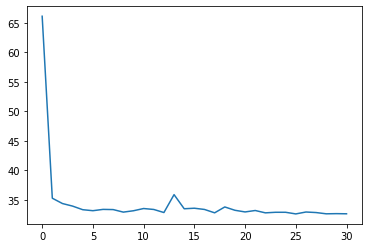

In [19]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.show()

# Results


In [23]:
from sklearn import metrics
from scipy.special import expit
from scipy.stats import nbinom

In [33]:
logits = model.predict(X_test).ravel()
p = 1 - expit(logits)
#y_pred = nbinom.rvs(1, p, size=len(p), random_state=42)
y_pred = 1 - nbinom.cdf(TIME_HORIZON, 1, p)
#y_pred = np.where(y_pred <= 60, 1, 0)

fpr, tpr, thresholds = metrics.roc_curve(y_test['censored'], y_pred, pos_label=1)

[0.02653671 0.22840931 0.26778526 0.60066026 0.19738246 0.31674118
 0.5749826  0.35899409 0.19858961 0.48408237 0.23940937 0.39516715
 0.41166186 0.54041365 0.35291942 0.51536884 0.58620024 0.37991896
 0.22322615 0.08244721 0.42952158 0.29658472 0.28643979 0.10678019
 0.19957366 0.55856835 0.26464571 0.08922931 0.03801238 0.5000471
 0.12432447 0.60339275 0.41647471 0.07075258 0.05780733 0.01782328
 0.44340628 0.10072562 0.44831464 0.14692782 0.26501179 0.33112875
 0.44259664 0.38538861 0.08198909 0.12325043 0.36904541 0.3490236
 0.23142445 0.52191055 0.34520841 0.48877111 0.50079424 0.10491004
 0.03463422 0.44808017 0.21358726 0.45828716 0.36240667 0.20023859
 0.39508401 0.38869458 0.03407793 0.28053582 0.50417738 0.42205359
 0.42780373 0.62036677 0.19048601 0.4518911  0.57510286 0.21974368
 0.47163915 0.17884149 0.16452227 0.19134761 0.38530891 0.34144436
 0.19952375 0.5059341  0.17397435 0.57551658 0.27560078 0.32348955
 0.17764618 0.55156883 0.20004209 0.47629347 0.18522692 0.056228

# Open Points and Future Work

- From which point we are trying to estimate the survival time? 
    - From the exit (censored)
    - From the begining (probably not of interest? + covariates are not aligned with the status of the patient at the begining)
    - Any time point 
    
- Time Horizon: what value? ho 